# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
dataset = get_dataset("data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle

import numpy as np
import operator

In [4]:
def display_instances(batch):
  colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
  f, ax = plt.subplots(2, 5, figsize=(20, 10))
  plt.axis('off')

  i = 0

  for sample in batch:
    x = i % 2
    y = i % 5

    img, classes, bboxes = sample["image"].numpy(), sample["groundtruth_classes"].numpy(), sample["groundtruth_boxes"].numpy()
    ax[x, y].imshow(img)
    ax[x, y].axis('off')
    im_width, im_height, _ = img.shape
    for cl, bb in zip(classes, bboxes):
      y1, x1, y2, x2 = bb

      y1 *=im_height
      x1 *=im_width
      y2 *=im_height
      x2 *=im_width
      
      rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
      ax[x, y].add_patch(rec)
    i += 1
  
  plt.tight_layout()
  plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

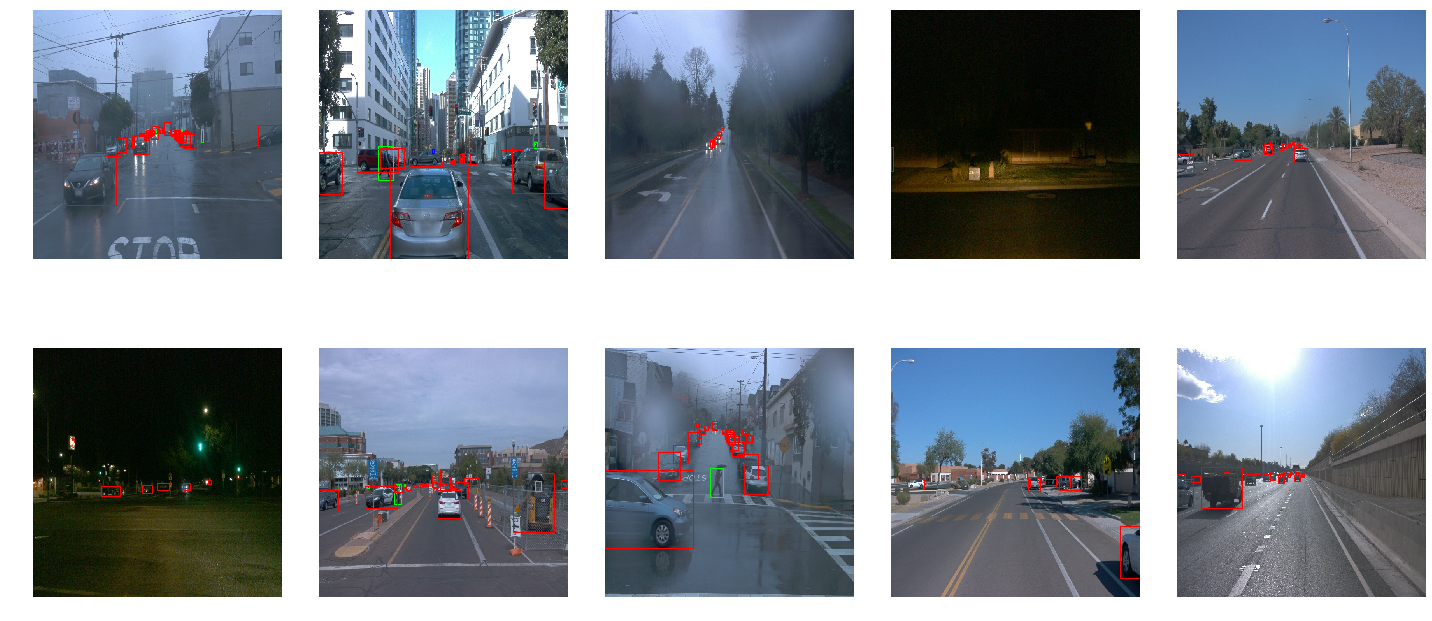

In [5]:
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
def countDetPerFrame(dataset):
  class_dist_dict = {}
  for sample in dataset:
    classes = sample["groundtruth_classes"].numpy()
    class_dict = {}
    for cl in classes:
      if cl in class_dict:
        class_dict[cl] += 1
      else:
        class_dict[cl] = 0
    for key in class_dict:
      keyCount = class_dict[key]
      # print("Key: ", key, ", Count: ", keyCount)
      if key not in class_dist_dict:
        class_dist_dict[key] = []
      class_dist_dict[key].append(keyCount)
  return class_dist_dict


def countDet(dataset):
  class_dist_dict = {}
  for sample in dataset:
    classes = sample["groundtruth_classes"].numpy()
    class_dict = {}
    for cl in classes:
      if cl in class_dict:
        class_dict[cl] += 1
      else:
        class_dict[cl] = 0
    for key in class_dict:
      keyCount = class_dict[key]
      # print("Key: ", key, ", Count: ", keyCount)
      if key not in class_dist_dict:
        class_dist_dict[key] = {}
      #   print("[New] class_dist_dict: ", class_dist_dict)
      # print ("class_dist_dict[key]: ", class_dist_dict[key])
      if keyCount not in class_dist_dict[key]:
        class_dist_dict[key][keyCount] = 1
      else:
        class_dist_dict[key][keyCount] += 1
  return class_dist_dict


def countTotalClass(dataset):
  class_dict = {}
  for sample in dataset:
    classes = sample["groundtruth_classes"].numpy()
    for cl in classes:
      if cl in class_dict:
        class_dict[cl] += 1
        # print("Class: ", cl, ", ", class_dict[cl])
      else:
        class_dict[cl] = 1
        # print("Class: ", cl, ", ", class_dict[cl])
  return class_dict

In [7]:
classMap = {1:"Car", 2:"Pedestrain", 4:"Cyclist"}
datasetSub = dataset.take(50000)

<BarContainer object of 3 artists>

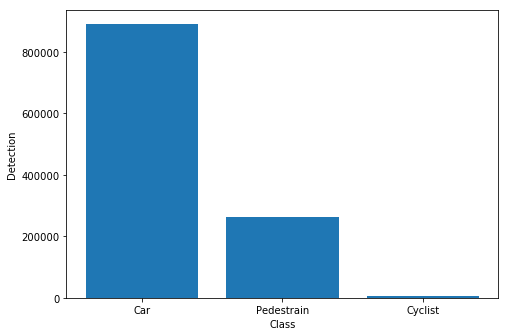

In [8]:
class_dict = countTotalClass(datasetSub)
# print("class_dict: ", class_dict)
# class_dict = dict( sorted(class_dict.items(), key=operator.itemgetter(1),reverse=True))
fig = plt.figure()  
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Class')
ax.set_ylabel('Detection')
lKey = []
for key in class_dict:
    lKey.append(classMap[key])
ax.bar(lKey, class_dict.values())

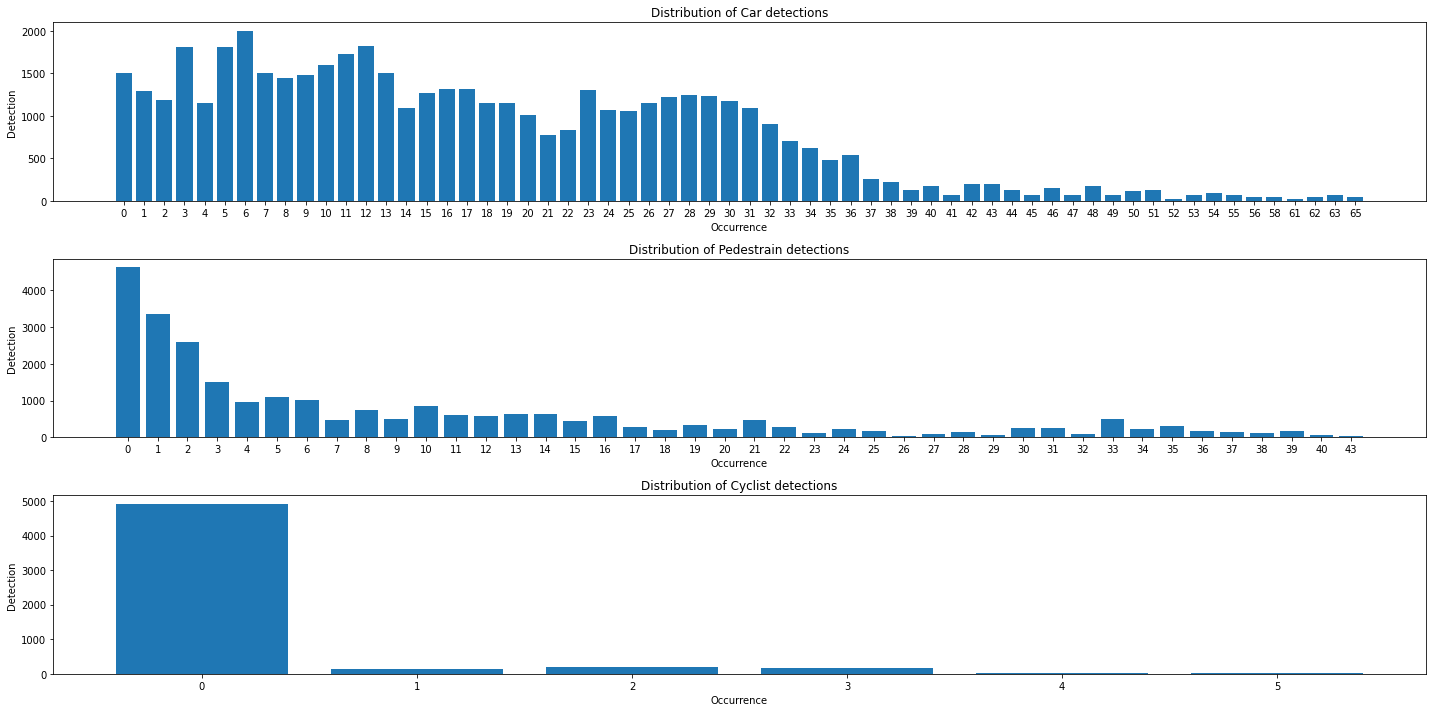

In [21]:
import seaborn as sns
figg, axx = plt.subplots(3, 1, figsize=(20, 10), tight_layout = True)
class_dist_dict = countDet(datasetSub)
# print("class_dist_dict: ", class_dist_dict)
for cc, key in enumerate(class_dist_dict):
    d = class_dist_dict[key]
#     d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    d = dict( sorted(d.items(), key=operator.itemgetter(0)))
    axx[cc].bar(list(map(str, d.keys())), d.values())
    axx[cc].set_xlabel("Occurrence")
    axx[cc].set_ylabel("Detection")
    axx[cc].set_title("Distribution of " + classMap[key] + " detections") 

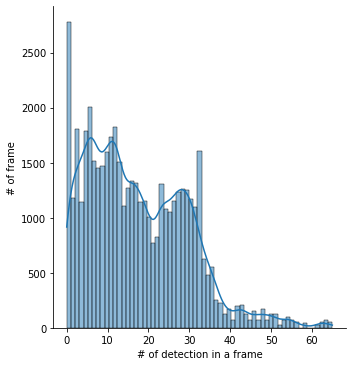

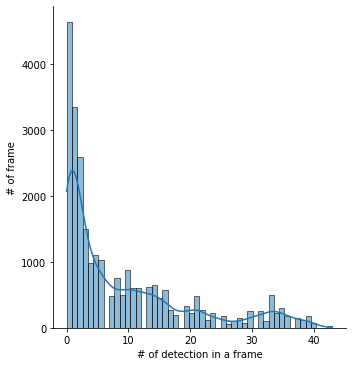

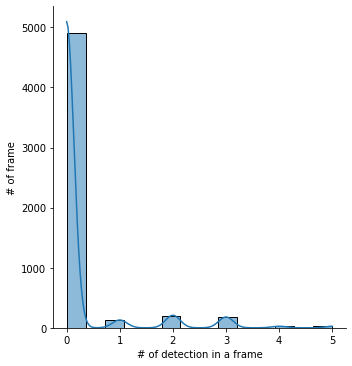

In [29]:
class_dist_dict_per = countDetPerFrame(datasetSub)
for cc, key in enumerate(class_dist_dict_per):
    d = class_dist_dict_per[key]
    sns_plot = sns.displot(data = d, kde = True)
#     sns_plot.set(xlabel='# of detection in a frame', ylabel='# of frame', title = 'Distribution of ' + classMap[key] + ' detection')
    sns_plot.set(xlabel='# of detection in a frame', ylabel='# of frame')
plt.show()